In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
meta_data = pd.read_csv("GSE118020_meta_data.csv")

In [23]:
# let's see the first 15 rows, to have an idea of the structure

meta_data.head(15)

,Unnamed: 0,nGene,nUMI,orig.ident,percent.mito,Sample,tree.ident,CellType,L2_Clustering
0,AAACCTGAGTGAACGC.NAc_Sample1,2065,4676,D2_2,0.033362,NAc_Sample1,6.0,D2,D2_2
1,AACCGCGTCAGCTCTC.NAc_Sample1,2721,7759,D2_2,0.021266,NAc_Sample1,6.0,D2,D2_2
2,ACACCCTAGCTGAACG.NAc_Sample1,2387,5822,D2_2,0.020268,NAc_Sample1,6.0,D2,D2_2
3,CCGTGGAAGCTACCGC.NAc_Sample1,2656,6514,D2_2,0.027479,NAc_Sample1,6.0,D2,D2_2
4,CCTCAGTTCTTCCTTC.NAc_Sample1,2768,7784,D2_2,0.018885,NAc_Sample1,6.0,D2,D2_2
5,CCTCTGAGTATATGAG.NAc_Sample1,2644,6508,D2_2,0.039797,NAc_Sample1,6.0,D2,D2_2
6,CCTCTGAGTCCAACTA.NAc_Sample1,2782,7707,D2_2,0.019074,NAc_Sample1,6.0,D2,D2_2
7,CTCTACGGTCCAGTGC.NAc_Sample1,2524,6983,D2_2,0.014607,NAc_Sample1,6.0,D2,D2_2
8,GCGCAACAGTGAAGTT.NAc_Sample1,2957,8638,D2_2,0.023617,NAc_Sample1,6.0,D2,D2_25
9,GTATCTTGTAACGCGA.NAc_Sample1,2593,6500,D2_2,0.019231,NAc_Sample1,6.0,D2,D2_2


In [8]:
# let's check the shape of the dataframe

meta_data.shape

(47576, 9)

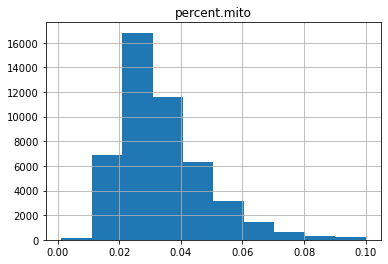

In [18]:
# let's plot the values of the percent.mito (1) and save the figure (2)

meta_data.hist(column='percent.mito')

plt.savefig("percent.mito_hist.svg",format='svg', facecolor="w")

In [21]:
# let's chekc if there are any null values on the columns of the dataframe

meta_data.isnull().sum()

Unnamed: 0           0
nGene                0
nUMI                 0
orig.ident           0
percent.mito         0
Sample               0
tree.ident       25734
CellType             0
L2_Clustering        0
dtype: int64

<p> Apparently the tree.ident column has a lot of NaN values... </p>

In [24]:
# Let's clean the first column, removing the .Nac_Sample part from the string (since the Nac_Sample is a column by itself)

meta_data['Unnamed: 0'] = meta_data['Unnamed: 0'].apply(lambda x: x.split('.')[0])

In [25]:
meta_data.head(15)

,Unnamed: 0,nGene,nUMI,orig.ident,percent.mito,Sample,tree.ident,CellType,L2_Clustering
0,AAACCTGAGTGAACGC,2065,4676,D2_2,0.033362,NAc_Sample1,6.0,D2,D2_2
1,AACCGCGTCAGCTCTC,2721,7759,D2_2,0.021266,NAc_Sample1,6.0,D2,D2_2
2,ACACCCTAGCTGAACG,2387,5822,D2_2,0.020268,NAc_Sample1,6.0,D2,D2_2
3,CCGTGGAAGCTACCGC,2656,6514,D2_2,0.027479,NAc_Sample1,6.0,D2,D2_2
4,CCTCAGTTCTTCCTTC,2768,7784,D2_2,0.018885,NAc_Sample1,6.0,D2,D2_2
5,CCTCTGAGTATATGAG,2644,6508,D2_2,0.039797,NAc_Sample1,6.0,D2,D2_2
6,CCTCTGAGTCCAACTA,2782,7707,D2_2,0.019074,NAc_Sample1,6.0,D2,D2_2
7,CTCTACGGTCCAGTGC,2524,6983,D2_2,0.014607,NAc_Sample1,6.0,D2,D2_2
8,GCGCAACAGTGAAGTT,2957,8638,D2_2,0.023617,NAc_Sample1,6.0,D2,D2_25
9,GTATCTTGTAACGCGA,2593,6500,D2_2,0.019231,NAc_Sample1,6.0,D2,D2_2


In [26]:
# Let's rename the first column

meta_data.rename(columns={'Unnamed: 0':'Gene'}, inplace=True)
meta_data.head(5)

,Gene,nGene,nUMI,orig.ident,percent.mito,Sample,tree.ident,CellType,L2_Clustering
0,AAACCTGAGTGAACGC,2065,4676,D2_2,0.033362,NAc_Sample1,6.0,D2,D2_2
1,AACCGCGTCAGCTCTC,2721,7759,D2_2,0.021266,NAc_Sample1,6.0,D2,D2_2
2,ACACCCTAGCTGAACG,2387,5822,D2_2,0.020268,NAc_Sample1,6.0,D2,D2_2
3,CCGTGGAAGCTACCGC,2656,6514,D2_2,0.027479,NAc_Sample1,6.0,D2,D2_2
4,CCTCAGTTCTTCCTTC,2768,7784,D2_2,0.018885,NAc_Sample1,6.0,D2,D2_2


In [31]:
# Le'ts get the descriptive statistics of the DataFrame

meta_data.describe()

,nGene,nUMI,percent.mito,tree.ident
count,47576.000000,47576.000000,47576.000000,21842.000000
mean,2179.451698,5942.250063,0.033947,7.115557
std,963.890012,3627.385562,0.014169,0.999985
min,801.000000,1495.000000,0.001205,4.000000
25%,1281.000000,2927.000000,0.023827,7.000000
50%,2067.000000,4867.500000,0.030764,7.000000
75%,2964.000000,8299.250000,0.040892,8.000000
max,6664.000000,36814.000000,0.099962,8.000000


In [32]:
# Le'ts get the descriptive Statistics

meta_data.describe(include=object)

,Gene,orig.ident,Sample,CellType,L2_Clustering
count,47576,47576,47576,47576,47576
unique,46224,57,11,9,98
top,CATCAGATCTGGTATG,Astro_4,NAc_Sample11,D1,Astro_4
freq,3,6937,6434,12342,6937


In [40]:
# let's see which are these 9 unique CellType

meta_data['CellType'].unique()

array(['D2', 'D1', 'IN', 'NB', 'Oligo', 'OPC', 'Astro', 'Micro', 'Endo'],
      dtype=object)

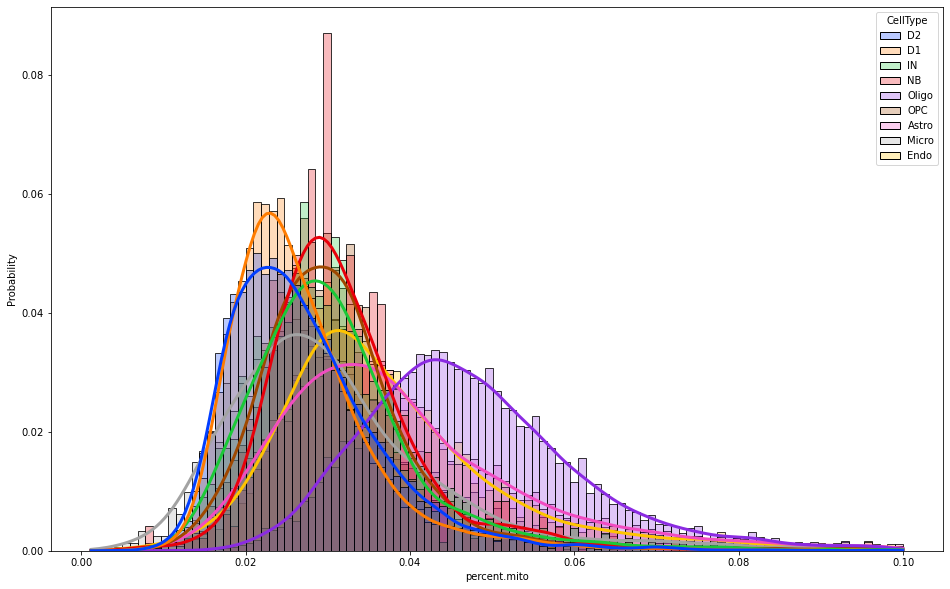

In [65]:
fig100 = plt.figure(figsize=(16,10))
sns.histplot(data=meta_data, x='percent.mito', hue='CellType',kde=True, stat='probability', common_norm=False, line_kws={'lw':3}, alpha=0.27, palette='bright')
plt.show()

fig100.savefig('histplot_kde.svg',format='svg', facecolor='w')

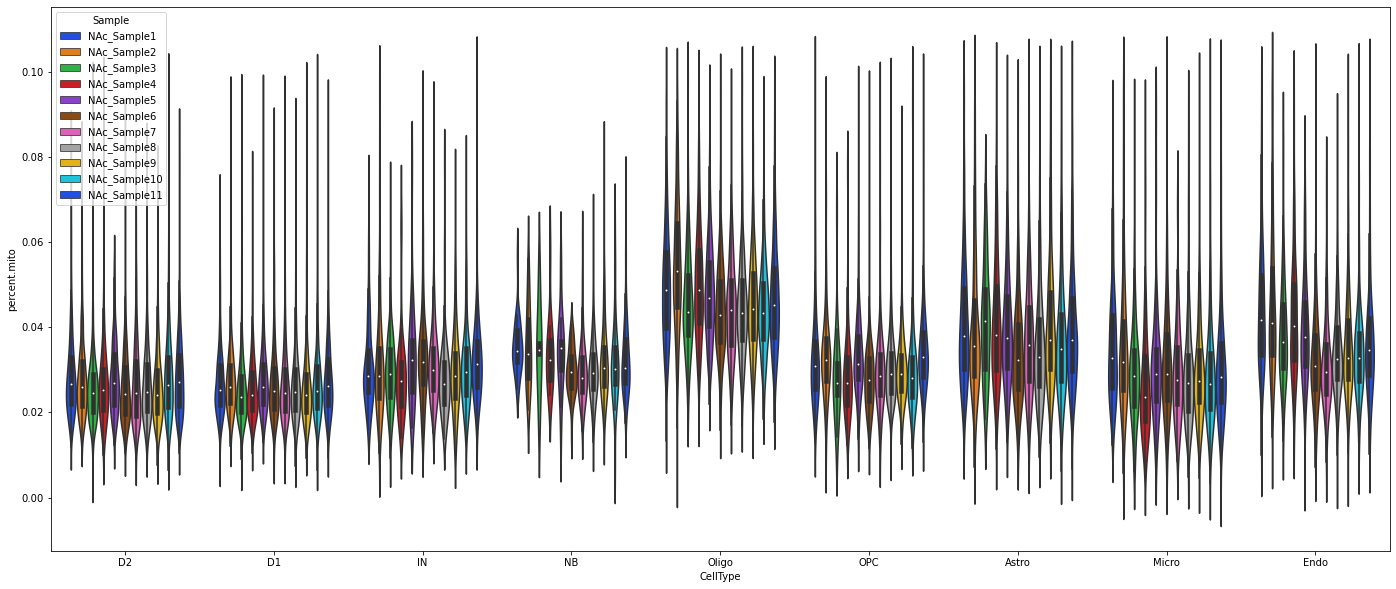

In [70]:
# Let's do a box plot for distribution

fig200 = plt.figure(figsize=(24,10))
sns.violinplot(data=meta_data, x='CellType',y='percent.mito', hue='Sample', palette='bright')
plt.show()

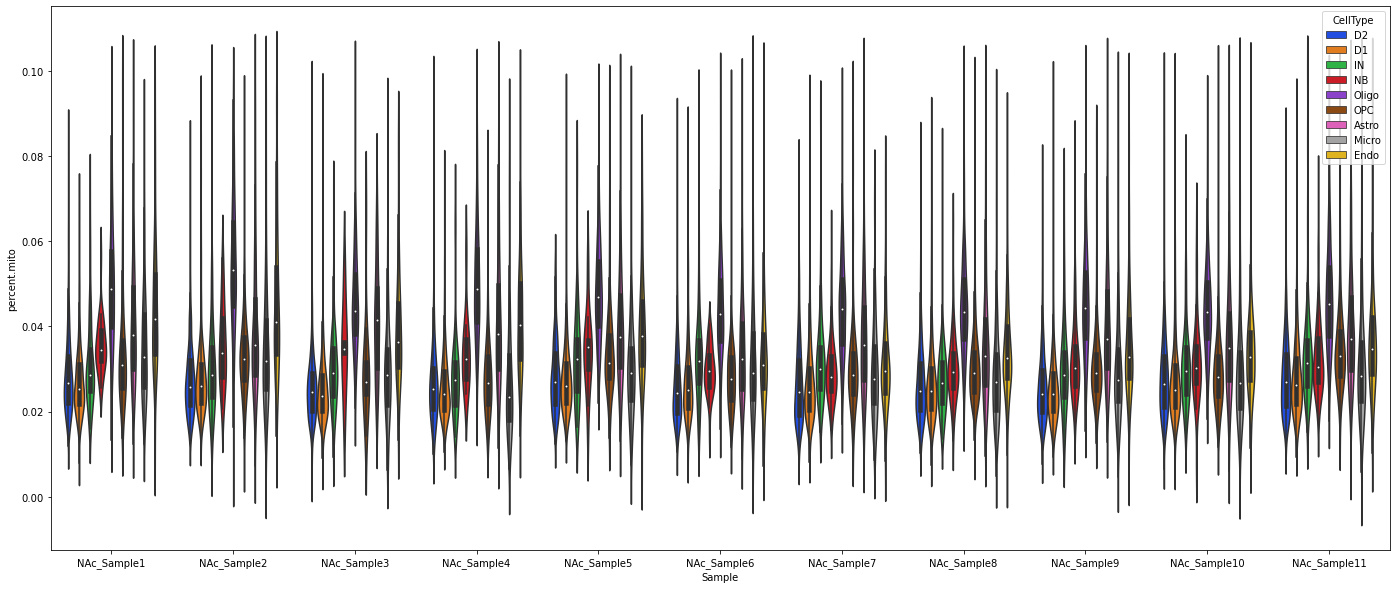

In [71]:
fig300 = plt.figure(figsize=(24,10))
sns.violinplot(data=meta_data, x='Sample',y='percent.mito', hue='CellType', palette='bright')
plt.show()